In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
engine.execute('select max(date) from measurement').fetchall()

[('2017-08-23',)]

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_year = '2016-08-23'
# Perform a query to retrieve the data and precipitation scores

data_pcrp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

df_data_pcrp = pd.DataFrame(data_pcrp)
df_data_pcrp.columns = ['date', 'pcrp']
df_data_pcrp.head()


,date,pcrp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [20]:
# Sort the dataframe by date

df_data_pcrp.sort_values('date').dropna()
df_data_pcrp.head()

,date,pcrp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


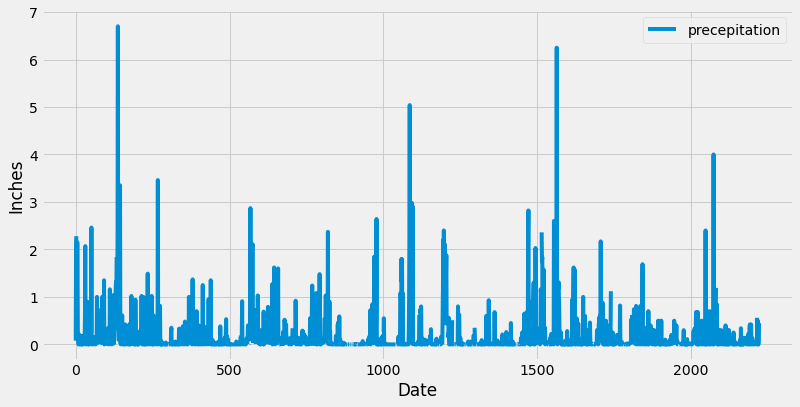

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data

ax = df_data_pcrp.plot(figsize=(12,6))
ax.set_xlabel('Date')
ax.set_ylabel('Inches')
plt.legend(['precepitation'])
plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_data_pcrp.describe()

,pcrp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset
locations = session.query(Measurement).group_by(Measurement.station).count()
print("{} stations in dataset".format(locations))

9 stations in dataset


In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = active[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == temps).all()

[(54.0, 71.66378066378067, 85.0)]

Text(0, 0.5, 'Frequency')

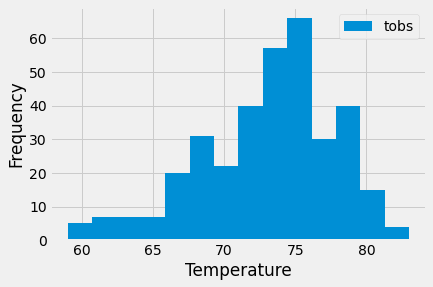

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= "2016-08-24")\
    .filter(Measurement.date <= "2017-08-23").filter(Measurement.station == temps).all()


results=pd.DataFrame(results)
results.plot.hist(bins=14)
plt.legend(['tobs'])
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close session

In [27]:
# Close Session
session.close()